In [227]:
import gym
import sys
import numpy as np
import matplotlib
from collections import defaultdict
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


%matplotlib inline
matplotlib.style.use("ggplot")

In [245]:
def plot_value_function(V, title):
    """
    Plots the value function as a surface plot.
    """
    min_x = min(k[0] for k in V.keys())
    max_x = max(k[0] for k in V.keys())
    min_y = min(k[1] for k in V.keys())
    max_y = max(k[1] for k in V.keys())

    x_range = np.arange(min_x, max_x + 1)
    y_range = np.arange(min_y, max_y + 1)
    X, Y = np.meshgrid(x_range, y_range)

    Z_noace = np.apply_along_axis(lambda _: V[(_[0], _[1], False)], 2, np.dstack([X, Y]))
    Z_ace = np.apply_along_axis(lambda _: V[(_[0], _[1], True)], 2, np.dstack([X, Y]))
    
    def plot_surface(X, Y, Z, title=None):
        fig = plt.figure(figsize=(20, 10), facecolor='white')

        ax = fig.add_subplot(111, projection='3d')
        surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                               cmap=matplotlib.cm.coolwarm, vmin=-1.0, vmax=1.0)
        ax.set_xlabel('Player sum')
        ax.set_ylabel('Dealer showing')
        ax.set_zlabel('Value')
        if title: ax.set_title(title)
        ax.view_init(ax.elev, -120)
        ax.set_facecolor("white")
        fig.colorbar(surf)
        plt.show()

    plot_surface(X, Y, Z_noace, "(No Usable Ace)")
    plot_surface(X, Y, Z_ace, "(Usable Ace)")

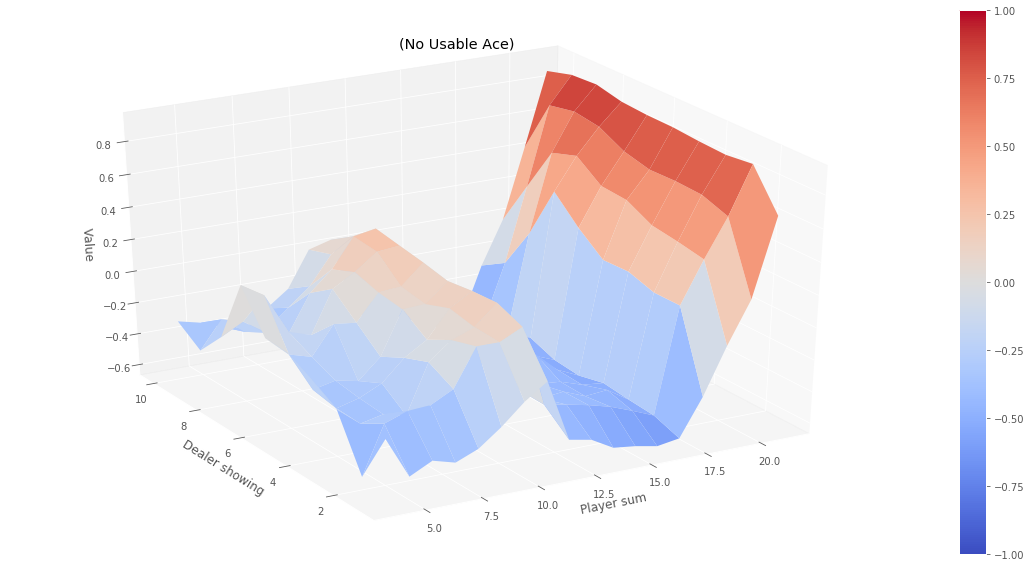

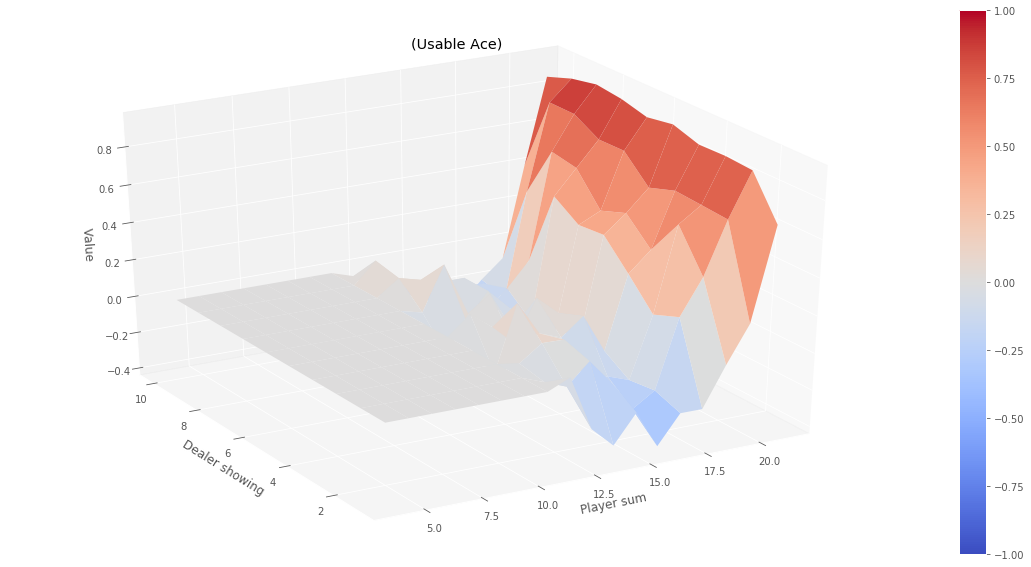

In [246]:
env = gym.make("Blackjack-v0")

def simple_policy(state):
    player_score, _, _ = state
    return 0 if player_score >= 18 else 1

def mc_firstvisit_prediction(policy, env, num_episodes, 
                             episode_endtime= 10, discount = 1.0):
    r_sum = defaultdict(float)
    r_count = defaultdict(float)
    r_V = defaultdict(float)
    
    for i in range(num_episodes):
        # print out the episodes rate for displaying.
        episode_rate = int(40 * i / num_episodes)
        print("Episode {}/{}".format(i+1, num_episodes), end="\r")
        sys.stdout.flush()
            
        # init the episode list and state
        episode = []
        state = env.reset()

        # Generate an episode which including tuple(state, aciton, reward).
        for j in range(episode_endtime):
            action = policy(state)
            next_state, reward, done, _ = env.step(action)
            episode.append((state, action, reward))
            if done: break
            state = next_state
        
        # first visit mc method
        for k, data_k in enumerate(episode):
            state_k = data_k[0]
            G = sum([x[2] * np.power(discount, i) for i,x in enumerate(episode[k:])])
            r_sum[state_k] += G
            r_count[state_k] += 1.0
            r_V[state_k] = r_sum[state_k] / r_count[state_k]
    
    return r_V

v1 = mc_firstvisit_prediction(simple_policy, env, 100000)
plot_value_function(v1, title=None)

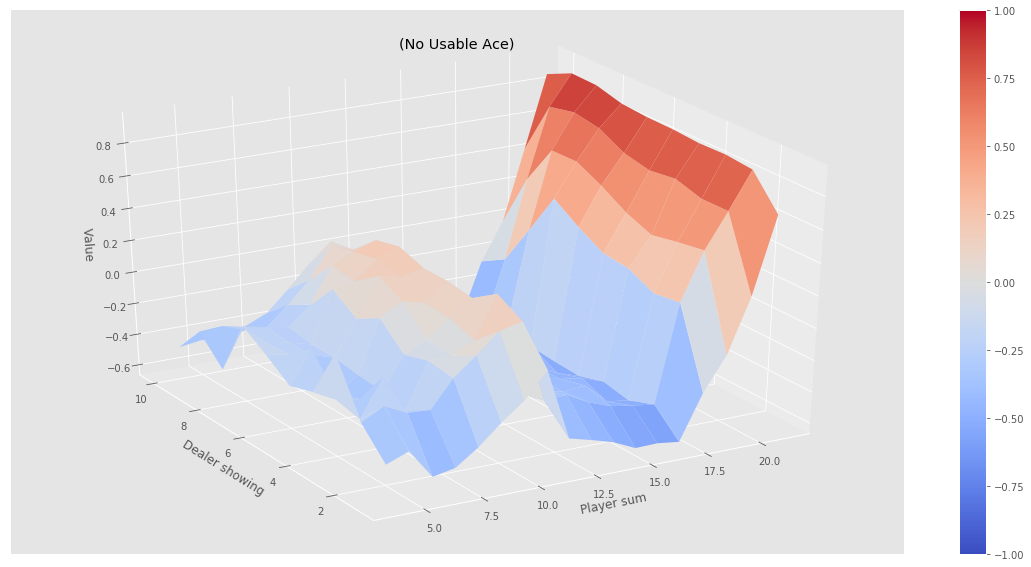

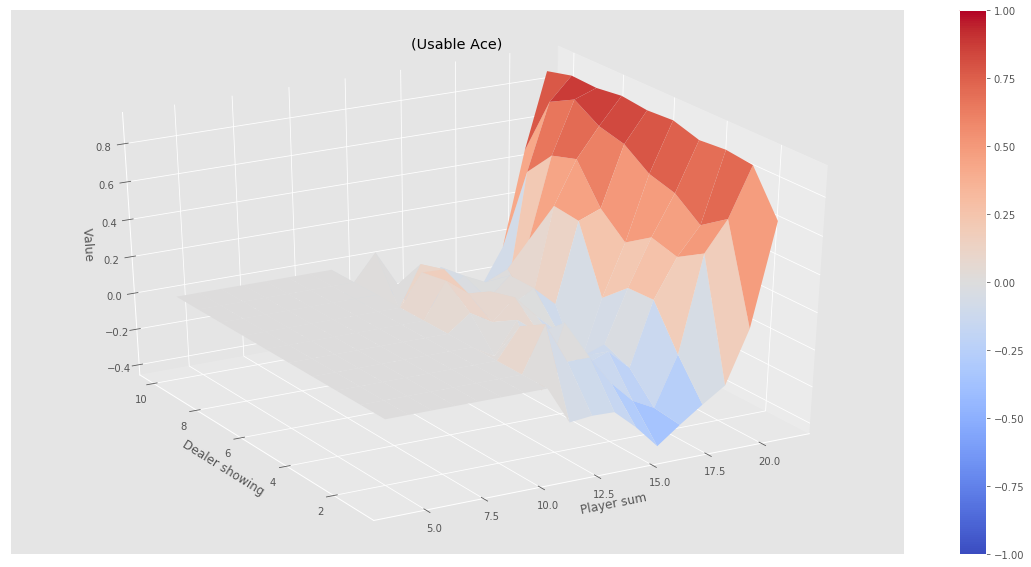

In [235]:
env = env = gym.make("Blackjack-v0")

def simple_policy(state):
    player_score, _, _ = state
    return 0 if player_score >= 18 else 1

def mc_everyvisit_prediction(policy, env, num_episodes, episode_endtime = 10, discount = 1.0):
    r_sum = defaultdict(float)
    r_count = defaultdict(float)
    r_V = defaultdict(float)
    
    for i in range(num_episodes):
        # print out the episodes rate for displaying.
        episode_rate = int(80 * i / num_episodes)
        print("Episode {}/{}".format(i+1, num_episodes) + "=" * episode_rate, end="\r")
        sys.stdout.flush()
            
        # init the episode list and state
        episode = []
        state = env.reset()

        # Generate an episode which including tuple(state, aciton, reward).
        for j in range(episode_endtime):
            action = policy(state)
            next_state, reward, done, _ = env.step(action)
            episode.append((state, action, reward))
            if done: break
            state = next_state
        
        # every visit mc method
        for k, data_k in enumerate(episode):
            state_k = data_k[0]
            G = sum([x[2] * np.power(discount, i) for i,x in enumerate(episode)])
            r_sum[state_k] += G
            r_count[state_k] += 1.0
            r_V[state_k] = r_sum[state_k] / r_count[state_k]
    
    return r_V

v2 = mc_everyvisit_prediction(simple_policy, env, 100000)
plot_value_function(v2, title=None)

In [247]:
v1

defaultdict(float,
            {(4, 1, False): -0.25862068965517243,
             (4, 1, True): 0.0,
             (4, 2, False): -0.5853658536585366,
             (4, 2, True): 0.0,
             (4, 3, False): -0.2549019607843137,
             (4, 3, True): 0.0,
             (4, 4, False): -0.16,
             (4, 4, True): 0.0,
             (4, 5, False): -0.08108108108108109,
             (4, 5, True): 0.0,
             (4, 6, False): -0.06976744186046512,
             (4, 6, True): 0.0,
             (4, 7, False): 0.17647058823529413,
             (4, 7, True): 0.0,
             (4, 8, False): -0.23076923076923078,
             (4, 8, True): 0.0,
             (4, 9, False): -0.4,
             (4, 9, True): 0.0,
             (4, 10, False): -0.2958579881656805,
             (4, 10, True): 0.0,
             (5, 1, False): -0.5196078431372549,
             (5, 1, True): 0.0,
             (5, 2, False): -0.2804878048780488,
             (5, 2, True): 0.0,
             (5, 3, False): -0.3